# Enzyme kinetics #
###  Mathematical Biology | University of Cambridge |  Lent 2020 ### 
Ronojoy Adhikari (ra413)

----

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### 1. Model ### 

The catalysis of substrate $S$ into product $P$ by enzyme $E$ is determined by the three reactions

$$
\begin{align}
S + E &\rightarrow C\quad\quad\,\,\,\,(\text{rate  $k_1$})\\
C &\rightarrow S + E\quad (\text{rate  $k_{-1}$})\\
C &\rightarrow P + E\quad (\text{rate  $k_{2}$})\\
\end{align}
$$

comprising of the reversible binding of the substrate and enzyme into a complex $C$ and the irreversible unbinding of the complex into product and regenerated enzyme. Denoting the concentration of substrate, enzyme, complex and product by $s$, $e$, $c$ and $p$ respectively, the equation of motion is 

$$
\begin{align}
\frac{ds}{dt} &= aN - bNP = N(a-bP)\\
\frac{de}{dt} &= cNP - dp = P(cN-d)\\
\frac{dc}{dt} &= cNP - dp = P(cN-d)\\
\frac{dp}{dt} &= cNP - dp = P(cN-d)\\
\end{align}
$$

Here $a$, $d$ are growth rates for prey and predators and $c$, $d$ are coefficients determining the intensity of the effects of predation. We rescale the model to bring into the working form 

$$
\begin{equation}
\frac{du}{dt} = u(1-v),\quad\frac{dv}{dt} = -\alpha v(1-u)
\end{equation}
$$

We make parameter choices and set up the right hand side of the differential equation for numerical solution. 

### 2. Numerical solution ##

In [32]:
# Non-dimensionalised Lotka-Volterra system

alpha = 1.0               # predation coefficient

F = lambda x, t :[ 
    x[0]*(1-x[1]),        # x[0] -> u - equation for prey
    x[1]*(x[0]-1)*alpha   # x[1] -> v - equation for predators
]

In [33]:
# Numerical integration of the system

# time step, final time, and time points of the solution
dt = 0.01; tf  = 10; t = np.arange(0,tf,dt)

# intial values of prey and predators: prey half as much as predators
x0 = [1,2]    

# integrate
x = odeint(F,x0,t)

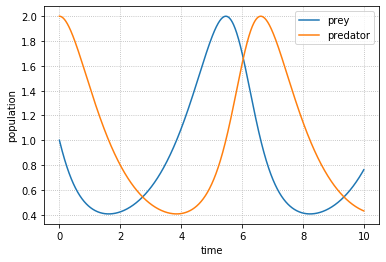

In [34]:
# Plot of the solution

plt.plot(t, x[:, 0], label='prey')
plt.plot(t, x[:, 1], label='predator')
plt.xlabel('time'); plt.ylabel('population')
plt.grid(linestyle=':');plt.legend();plt.show()

Ths solution shows that the prey and predator populations oscillate in time. Initially, the predators outnumber the prey, which leads to a decline of both populations (the prey because they are being predated upon, the predators because there is not enough prey). The reduction in the number of predators allows the prey to increase, which leads to an increase in the predators and a repeating cycle.

### 3. Orbits and the constant of motion ###

The Lotka-Volterra system has the constant of motion

$$ H(u, v) = \alpha(\log u - u)  + (\log u - v) $$

as is easily verified by computing its time derivative and using the working form of Lotka-Volterra equations. The constant of motion determines the *orbits*, that is the curve obtained by plotting $u(t)$ against $v(t)$, for each $t$. In other words, the orbit is a curve in the $u-v$ plane parametrised by time. For the numerical solution, we obtain the orbit below, with the center of the dynamics indicated by a circle. 

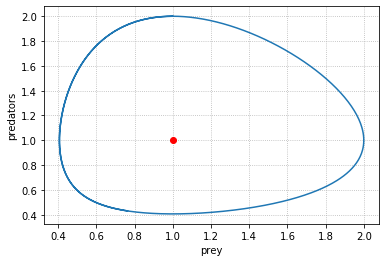

In [77]:
# Plot of  the orbit
plt.plot(x[:,0], x[:, 1])
plt.plot(1,1,'ro')
plt.xlabel('prey'); plt.ylabel('predators')
plt.grid(linestyle=':');plt.show()

The orbit is closed implying that the oscillations are periodic.

### 4. Phase portrait ###

The phase portrait of the system is obtained from the plotting the vector field $\boldsymbol F$ whose components are 

$$
F_1 = u(1-v),\quad F_2 = -\alpha(1-u)v
$$

The solution "flows" along the vector field and the streamlines of the vector field are solution curves. 

In [1]:
# Plot of the vector field 

# generate a grid of points in the plane
u, v = np.meshgrid(np.arange(0,2.2,0.15), np.arange(0,2.2,0.15))

# compute the components of the vector field at those points
F1 = u*(1-v); F2 = -alpha*(1-u)*v

# plot
fig, ax = plt.subplots(figsize=(6,6))
clr = np.sqrt(F1*F1 + F2*F2)
ax.quiver(u,v, Fu, Fv, clr, scale=30)
ax.axis([0,2,0,2])
ax.xaxis.set_ticks([]); ax.xaxis.set_label_text('prey')
ax.yaxis.set_ticks([]); ax.yaxis.set_label_text('$v$')
ax.plot(1,1,'ro')
plt.show()

NameError: name 'np' is not defined

### Exercises ###

* Examine the effect of changing the value of $\alpha$ on the solution, paying attention to the change in period of the oscillations and the lag in time between the maxima of the prey and predators.
* Examine the effect of changing the initial condition, covering the cases where (a) the prey are initially more numerous (b) the predators are initially more numerous and (c) both prey and predators are equally numerous. 
* Examine the effect of distance $d = \sqrt{u_0^2 + v_0^2}$ of the initial condition from the center at $(1,1)$ on the shape of the oscillations. What happens when the distance is zero ? 
* Examine, by modifying the codes above, the effect of small amounts of competition within each population on the resulting dynamics. 